Introdução a Ciência de Dados

Exemplo: Dataset Iris

The dataset is a CSV file which a set of 150 records under 6 attributes.

https://www.kaggle.com/datasets/uciml/iris?resource=download


Preparando o ambiente e importando os dados

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier

In [100]:
# lê arquivo da base de dados
df = pd.read_csv("Iris.csv")

In [101]:
# mostra os 5 primeiros valores do csv
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [102]:
# motra 5 valores aleatórios
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
106,107,4.9,2.5,4.5,1.7,Iris-virginica
42,43,4.4,3.2,1.3,0.2,Iris-setosa
119,120,6.0,2.2,5.0,1.5,Iris-virginica
49,50,5.0,3.3,1.4,0.2,Iris-setosa
74,75,6.4,2.9,4.3,1.3,Iris-versicolor


In [103]:
# acessa uma posição específica
df.iloc[[40]]
df.loc[[40]]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
40,41,5.0,3.5,1.3,0.3,Iris-setosa


In [104]:
# mostra o tamanho da base da dados
print(df.shape)
print(f"Número de linhas: {df.shape[0]} | Número de colunas (atributos): {df.shape[1]}")  

(150, 6)
Número de linhas: 150 | Número de colunas (atributos): 6


In [105]:
# busca informações informações se existe atributos nulos e seu formato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [106]:
y = df.Species
colunas_para_remover = ['Species', 'Id']
X = df.drop(colunas_para_remover, axis=1)

In [107]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [108]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


EDA - Exploratory Data Analysis

In [109]:
# Menor valor de cada coluna
display(X.min())

print(f"Min Sepal Lenght (numpy): {np.min(df.SepalLengthCm)}")

sepal_length_ordenado = sorted(df.SepalLengthCm)
menor = sepal_length_ordenado[0]
print(f"Min Sepal Length (na mão): {menor}")

SepalLengthCm    4.3
SepalWidthCm     2.0
PetalLengthCm    1.0
PetalWidthCm     0.1
dtype: float64

Min Sepal Lenght (numpy): 4.3
Min Sepal Length (na mão): 4.3


In [110]:
# Maior valor de cada coluna
display(X.max())

print(f"Max Sepal Lenght (numpy): {np.max(df.SepalLengthCm)}")

sepal_length_ordenado = sorted(df.SepalLengthCm)
maior = sepal_length_ordenado[-1]
print(f"Max Sepal Length (na mão): {maior}")

SepalLengthCm    7.9
SepalWidthCm     4.4
PetalLengthCm    6.9
PetalWidthCm     2.5
dtype: float64

Max Sepal Lenght (numpy): 7.9
Max Sepal Length (na mão): 7.9


In [111]:
# Média de cada coluna
display(X.mean())

print(f"Média Sepal Lenght (numpy): {np.mean(df.SepalLengthCm)}")

soma = sum(df.SepalLengthCm)
tamanho = len(df.SepalLengthCm)
media = soma/tamanho
print(f"Média Sepal lenght (na mão): {media}")

SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64

Média Sepal Lenght (numpy): 5.843333333333334
Média Sepal lenght (na mão): 5.843333333333334


In [112]:
# Mediana de cada coluna
display(X.median())

print(f"Mediana Sepal Lenght (numpy): {np.median(df.SepalLengthCm)}")

sepal_length_ordenado = sorted(df.SepalLengthCm)
tamanho = len(df.SepalLengthCm)

meio = int(tamanho/2)
mediana = 0;

#se for par ou impar
if tamanho%2 == 0:
  mediana = (sepal_length_ordenado[meio] + sepal_length_ordenado[meio-1])/2
else:
  mediana = sepal_length_ordenado[meio]

print(f"Mediana Sepal (na mão): {mediana}")

SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64

Mediana Sepal Lenght (numpy): 5.8
Mediana Sepal (na mão): 5.8


In [113]:
# Calculando a Moda
from collections import Counter

display(X.mode())

print("Numpy não possui função específica para calcular a moda \n")

contador = Counter(df.SepalLengthCm) #Mostra quandas vezes cada valor aparece
print(f"Contador: {contador}")
moda = contador.most_common()[0]
print(f"Moda Sepal Lenght (na mão): {moda}")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.0,3.0,1.5,0.2


Numpy não possui função específica para calcular a moda 

Contador: Counter({5.0: 10, 5.1: 9, 6.3: 9, 5.7: 8, 6.7: 8, 5.8: 7, 5.5: 7, 6.4: 7, 4.9: 6, 5.4: 6, 6.0: 6, 6.1: 6, 5.6: 6, 4.8: 5, 6.5: 5, 4.6: 4, 5.2: 4, 6.9: 4, 6.2: 4, 7.7: 4, 4.4: 3, 5.9: 3, 6.8: 3, 7.2: 3, 4.7: 2, 6.6: 2, 4.3: 1, 4.5: 1, 5.3: 1, 7.0: 1, 7.1: 1, 7.6: 1, 7.3: 1, 7.4: 1, 7.9: 1})
Moda Sepal Lenght (na mão): (5.0, 10)


In [114]:
#Quartil e Percentil
display(X.quantile(.25))
display(X.quantile(.50))
display(X.quantile(.75))

print(f"Quantilies Sepal Length (numpy): 25% {np.percentile(df.SepalLengthCm, 25)} | 50% {np.percentile(df.SepalLengthCm, 50)} | 75% {np.percentile(df.SepalLengthCm, 75)}")

sepal_length_ordenado = sorted(df.SepalLengthCm)
tamanho = len(df.SepalLengthCm)

meio = int(tamanho/2)
print(meio)
q25 = np.ceil(tamanho*.25)
print(q25)
q75 = np.ceil(tamanho*.75)
print(q75)

#mediana = q50
mediana = 0

#se for par ou impar
if tamanho%2 == 0:
  mediana = (sepal_length_ordenado[meio] + sepal_length_ordenado[meio-1])/2
else:
  mediana = sepal_length_ordenado[meio]

print(f"Quantiles Sepal Lenght (na mão): 25% {sepal_length_ordenado[int(q25)]} | 50% {mediana} | 75% {sepal_length_ordenado[int(q75)]}")

SepalLengthCm    5.1
SepalWidthCm     2.8
PetalLengthCm    1.6
PetalWidthCm     0.3
Name: 0.25, dtype: float64

SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
Name: 0.5, dtype: float64

SepalLengthCm    6.4
SepalWidthCm     3.3
PetalLengthCm    5.1
PetalWidthCm     1.8
Name: 0.75, dtype: float64

Quantilies Sepal Length (numpy): 25% 5.1 | 50% 5.8 | 75% 6.4
75
38.0
113.0
Quantiles Sepal Lenght (na mão): 25% 5.1 | 50% 5.8 | 75% 6.4


In [115]:
# Dispersão: Amplitude
amplitude_sepal_length = maior - menor
print(f"Amplitude (na mão): {amplitude_sepal_length}")

Amplitude (na mão): 3.6000000000000005


In [116]:
# Dispersão: Variância
display(X.var())

print(f"Variância (numpy): {np.var(df.SepalLengthCm, ddof=1)}")

variancia = 0
for i in df.SepalLengthCm:
  variancia += (i - media)**2
variancia /= tamanho -1

print(f"Variância (na mão): {variancia}")

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
dtype: float64

Variância (numpy): 0.6856935123042507
Variância (na mão): 0.6856935123042504


In [117]:
# Dispersão: Desvio Padrão
display(X.std())

print(f"Desvio Padrão (numpy): {np.std(df.SepalLengthCm, ddof=1)}")

desvio_padrao = variancia**.5
print(f"Desvio Padrão (na mão): {desvio_padrao}")

SepalLengthCm    0.828066
SepalWidthCm     0.433594
PetalLengthCm    1.764420
PetalWidthCm     0.763161
dtype: float64

Desvio Padrão (numpy): 0.828066127977863
Desvio Padrão (na mão): 0.8280661279778628


In [118]:
# O Pandas tem uma função chamanda describe que fornce informações estatísticas já tabelas para cada atributo.
X.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [119]:
# Covariância
X.cov()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,0.516904,-0.117981,1.296387,0.582414


In [120]:
# Correlação
X.corr(method="spearman")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.159457,0.881386,0.834421
SepalWidthCm,-0.159457,1.000000,-0.303421,-0.277511
PetalLengthCm,0.881386,-0.303421,1.000000,0.936003
PetalWidthCm,0.834421,-0.277511,0.936003,1.000000


Gráficos

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

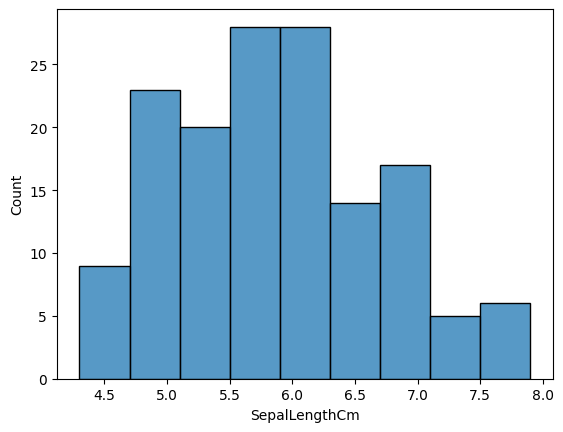

In [122]:
sns.histplot(data=df.	SepalLengthCm)

c:\Users\othon.jardim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Species', ylabel='SepalLengthCm'>

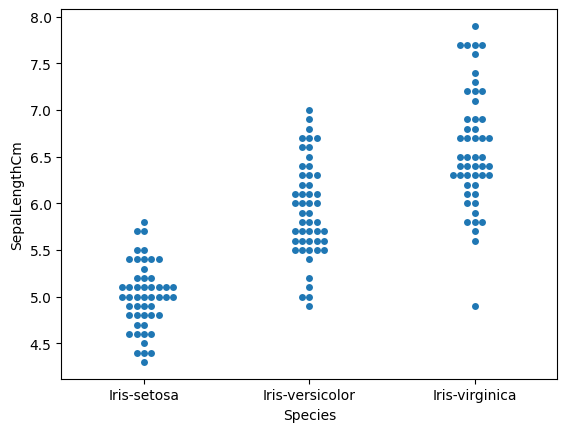

In [124]:
sns.swarmplot(x="Species", y="SepalLengthCm", data=df)

c:\Users\othon.jardim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Species', ylabel='SepalLengthCm'>

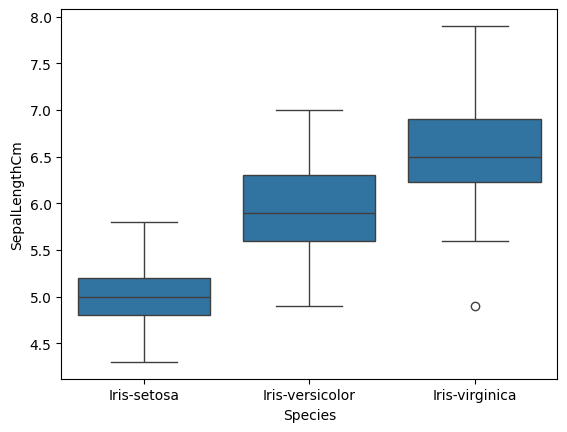

In [125]:
sns.boxplot(x="Species", y="SepalLengthCm", data=df)

c:\Users\othon.jardim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\othon.jardim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\othon.jardim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

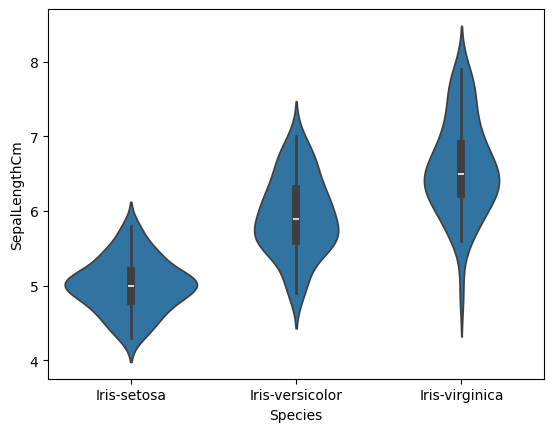

In [126]:
sns.violinplot(x="Species", y="SepalLengthCm", data=df)

<Axes: >

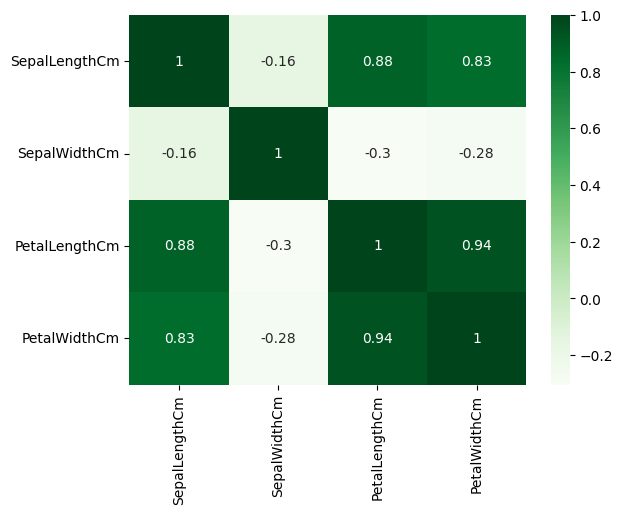

In [130]:
sns.heatmap(X.corr(method="spearman"), annot=True, cmap="Greens")

<Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

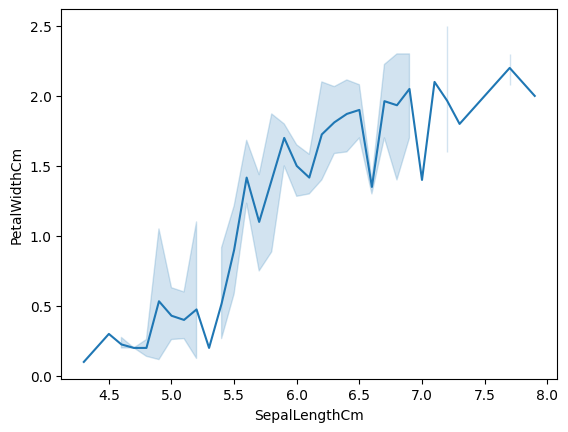

In [133]:
sns.lineplot(x="SepalLengthCm", y="PetalWidthCm", data=df)

<Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

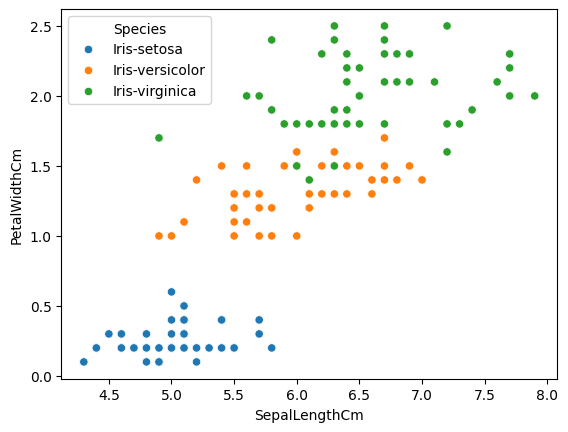

In [142]:
sns.scatterplot(x="SepalLengthCm", y="PetalWidthCm", hue="Species", data=df)